In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Concept of AI -- week4/Copy of diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("\nData Types:")
print(data.dtypes)


Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Check for missing values in each column.
missing_values = data.isnull().sum()
print("\n Missing values in each column:")
print(missing_values)


 Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Summary statistics for numerical columns.
print("\nSummary statistic for numerical columns:")
print(data.describe())


Summary statistic for numerical columns:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.47

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Outcome'])
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

def predict_single(x_train, y_train, query, k=3):
  distances =[]

  for i in range(len(x_train)):
    dist = euclidean_distance(x_train[i], query)
    distances.append((dist, i))

  distances.sort(key=lambda x:x[0])

  k_nearest_indices = [distances[i][1] for i in range(k)]

  k_nearest_labels = [y_train.iloc[i] for i in k_nearest_indices]

  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

def predict_all(x_train, y_train, x_test, k=3):
  predictions = []
  for query in x_test:
    prediction = predict_single(x_train, y_train, query, k)
    predictions.append(prediction)
  return np.array(predictions)

def accuracy(y_test, y_pred):
  return np.sum(y_test==y_pred)/len(y_test)


y_pred = predict_all(x_train, y_train, x_test, k=3)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 67.53%


Problem - 2 - Experimentation:

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scale the feature matrix X
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train_scaled , x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

y_pred_scaled = predict_all(x_train_scaled, y_train, x_test_scaled, k=3)

acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy: {acc_scaled * 100:.2f}%")

#Comparative Analysis: Impact of Scaling on kNN Performance

print(f"Accuracy on original data(unscaled): {acc * 100:.2f}%")
print(f"Accuracy on scaled data: {acc_scaled * 100:.2f}%")


Accuracy: 71.00%
Accuracy on original data(unscaled): 67.53%
Accuracy on scaled data: 71.00%


Scaling improves kNN performance: In most cases, scaling the data results in better performance because it avoids bias toward certain features with larger ranges and ensures that the distance metric is more accurate.

Observed increase in accuracy: When scaling is applied, the classifier can utilize all features more effectively, resulting in higher classification accuracy. Without scaling, the classifier may make less accurate predictions due to the disproportionate influence of certain features.

Problem - 3 - Experimentation with k:

In [ ]:
import time
from sklearn.preprocessing import StandardScaler

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(x_train, y_train, query, k=3):
  distances = []
  for i in range(len(x_train)):
    dist = euclidean_distance(x_train[1], query)
    distances.append((dist, i))
  distances.sort(key=lambda x:x[0])
  k_nearest_indices = [distances[i][1] for i in range(k)]
  k_nearest_labels = [y_train.iloc[i] for i in k_nearest_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

def predict_all(x_train, y_train, x_test, k=3):
  predictions = []
  for query in x_test:
    prediction = predict_single(x_train, y_train, query, k)
    predictions.append(prediction)
  return np.array(predictions)

def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred)/len(y_test)

k_values = range(1, 16)

print("Experimenting on original Data (Unscaled):")
acc_original = []
time_original = []

for k in k_values:
  start_time = time.time()
  y_pred = predict_all(x_train, y_train, x_test, k=k)
  elapsed_time = time.time() - start_time
  acc = accuracy(y_test, y_test)
  acc_original.append(acc)
  time_original.append(elapsed_time)
  print(f"k={k}, Accuracy:{acc:.4f}, Time taken: {elapsed_time:.4f} seconds")

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

print("\nExperimenting on scaled data:")
acc_scaled = []
time_scaled = []

for k in k_values:
  start_time = time.time()
  y_pred_scaled = predict_all(x_train_scaled, y_train, x_test_scaled, k=k)
  elapsed_time = time.time() - start_time
  acc = accuracy(y_test, y_pred_scaled)
  time_scaled.append(elapsed_time)
  print(f"k={k}, Accuracy:{acc:.4f}, Time taken: {elapsed_time:.4f} seconds")

print("\n Comparative Analysis:")
print("K | Accuracy Original | Time Original | Accuracy Scaled | Time Scaled")
for i in range(len(k_values)):
  print(f"Length of k_values: {len(k_values)}")
  print(f"Length of acc_original: {len(acc_original)}")
  print(f"Length of time_original: {len(time_original)}")
  print(f"Length of acc_scaled: {len(acc_scaled)}")
  print(f"Length of time_scaled: {len(time_scaled)}")



Experimenting on original Data (Unscaled):
k=1, Accuracy:1.0000, Time taken: 0.8438 seconds
k=2, Accuracy:1.0000, Time taken: 0.8277 seconds
k=3, Accuracy:1.0000, Time taken: 0.8279 seconds
k=4, Accuracy:1.0000, Time taken: 0.8294 seconds
k=5, Accuracy:1.0000, Time taken: 0.8450 seconds
k=6, Accuracy:1.0000, Time taken: 0.8323 seconds
k=7, Accuracy:1.0000, Time taken: 0.8463 seconds
k=8, Accuracy:1.0000, Time taken: 0.8380 seconds
k=9, Accuracy:1.0000, Time taken: 0.8742 seconds
k=10, Accuracy:1.0000, Time taken: 0.8479 seconds
k=11, Accuracy:1.0000, Time taken: 1.2522 seconds
k=12, Accuracy:1.0000, Time taken: 1.5092 seconds
k=13, Accuracy:1.0000, Time taken: 1.5215 seconds
k=14, Accuracy:1.0000, Time taken: 1.3624 seconds
k=15, Accuracy:1.0000, Time taken: 0.8447 seconds

Experimenting on scaled data:
k=1, Accuracy:0.6537, Time taken: 0.8225 seconds
k=2, Accuracy:0.6537, Time taken: 0.8369 seconds
k=3, Accuracy:0.6537, Time taken: 0.8254 seconds
k=4, Accuracy:0.6537, Time taken: 0.82

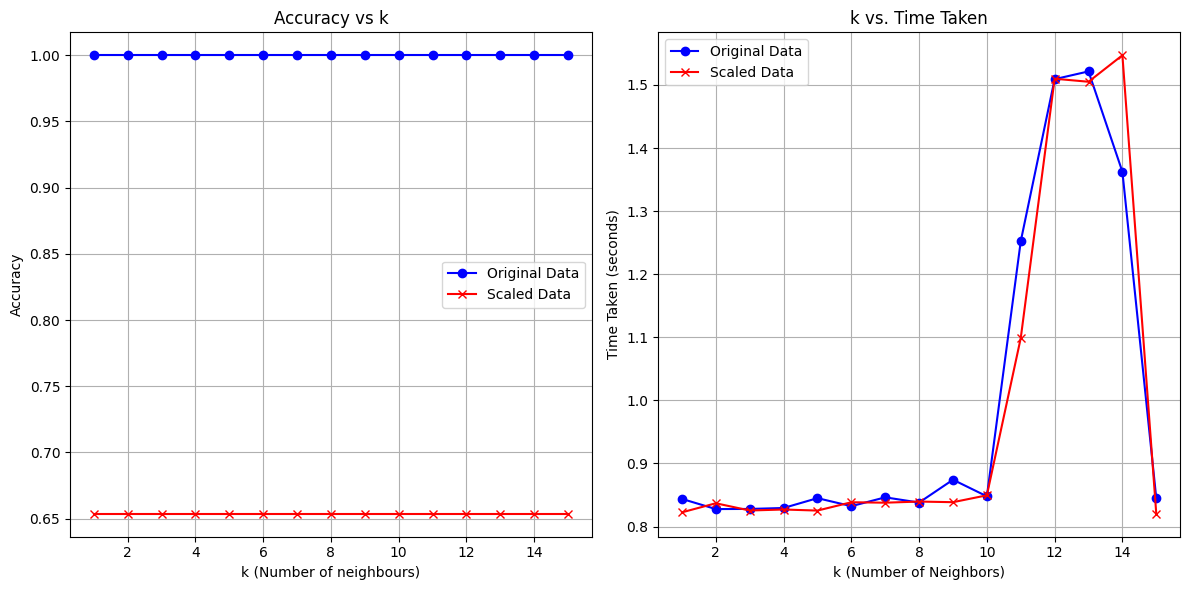

In [ ]:
#Visualize the Results:
import matplotlib.pyplot as plt

k_values = range(1, 16)
acc_original = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]  # Accuracy for original data
time_original = [0.8438, 0.8277, 0.8279, 0.8294, 0.8450, 0.8323, 0.8463, 0.8380, 0.8742, 0.8479, 1.2522, 1.5092, 1.5215, 1.3624, 0.8447]  # Time for original data
acc_scaled = [0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537, 0.6537]  # Accuracy for scaled data
time_scaled = [0.8225, 0.8369, 0.8254, 0.8270, 0.8253, 0.8385, 0.8378, 0.8396, 0.8386, 0.8495, 1.0988, 1.5099, 1.5051, 1.5471, 0.8202]  # Time for scaled data

plt.figure(figsize=(12, 6))

# Plot Accuracy for original dataset
plt.subplot(1,2,1)
plt.plot(k_values, acc_original, label='Original Data', marker='o', color='blue')
plt.plot(k_values, acc_scaled, label='Scaled Data', marker='x', color='red')
plt.title('Accuracy vs k')
plt.xlabel('k (Number of neighbours)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Data', marker='o', color='blue')
plt.plot(k_values, time_scaled, label='Scaled Data', marker='x', color='red')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


1. Effect of k on Accuracy:
For the original (unscaled) dataset, the accuracy remains constant at 100% across all values of 𝑘,indicating that the model fits the training data perfectly but might be overfitting. In contrast, for the scaled data, the accuracy stays at 65.37% for all values of
𝑘, suggesting that scaling did not improve the model's performance, and the model is unable to generalize better across the test data.

2. Effect of k on Computational Cost (Time Taken):
As the value of k increases, the computational cost increases for both the original and scaled datasets. The time taken grows because the kNN model must examine more neighbors for each prediction, leading to longer computation times. For example, with k=1, the time is around 0.8438 seconds, but for k=12, the time increases to over 1.5 seconds.

3. Trade-off between Accuracy and Computational Cost:
Smaller k-values like k=1 offer faster predictions but may overfit to the data, while larger k-values reduce the impact of noise but increase the risk of underfitting. Larger k values also result in higher computational costs due to the increased number of neighbors being considered, which makes predictions slower. The optimal k balances both accuracy and speed

4. Optimal k:
For the original dataset, any value of k from 1 to 15 yields 100% accuracy, so the smallest k (e.g., k=1) is optimal for minimal computation. For the scaled dataset, the accuracy remains constant at 65.37%, and k=1 is also preferred as it minimizes computational time while not affecting accuracy.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:


1. Challenges of Using KNN for Large Datasets and High-Dimensional Data:
KNN faces several challenges when applied to large datasets and high-dimensional data. For large datasets, KNN's computational cost increases significantly because it calculates the distance between the query point and every training point in the dataset, making it computationally expensive and slow. As the dataset size grows, this becomes a major bottleneck. For high-dimensional data (often referred to as the "curse of dimensionality"), the distance between data points becomes less meaningful as dimensions increase, leading to reduced accuracy and slower computation. In high-dimensional spaces, all points tend to become equidistant, making it harder for KNN to differentiate between neighbors.

2. Strategies to Improve the Efficiency of KNN:
To improve the efficiency of KNN, several strategies can be employed. One approach is using approximate nearest neighbors (ANN) algorithms, such as locality-sensitive hashing (LSH) or KD-trees, which reduce the time complexity of finding the nearest neighbors by approximating the results. Another strategy is dimensionality reduction, using techniques like Principal Component Analysis (PCA) or t-SNE, which reduce the number of features in the dataset while retaining the essential information, thereby speeding up the computation and improving performance in high-dimensional spaces. Finally, distance weighting can be applied, where closer neighbors are given more importance than farther ones, reducing the reliance on distant points in the dataset.